In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import star

In [2]:
image_path = '/home/zelenyy/npm/another/scientific-papers/Russian-Phd-LaTeX-Dissertation/Dissertation/images/thunderstorm/'

In [3]:
material = star.electron.PredefinedMaterials.AIR_DRY_NEAR_SEA_LEVEL

In [4]:
data = star.electron.calculate_estar_table(material)

In [7]:
help(star.electron.calculate_estar_table)

Help on function calculate_estar_table in module star.electron:

calculate_estar_table(material: Union[star.electron.MaterialParameters, star.electron.PredefinedMaterials])
     Stopping powers, ranges and radiation yields for standard energy grid. Return next columns:
        * Kinetic energy, `MeV`
        * Stopping power collision delta, `MeV cm2/g`
        * Stopping power radiative, `MeV cm2/g`
        * Stopping power total, `MeV cm2/g`
        * CSDA range, `g/cm2`
        * Radiation yield,
        * Density effect parameter delta
    
    Parameters
    ----------
    material
            special class description material or predefined material from `PredefinedMaterials` enumerations
    Returns
    -------
    data : ndarray with all data



In [5]:
energy = data["energy"]
indx = (energy < 150) * (energy>0.01)
energy = energy[indx]
stopPower = data["stopping_power_total"][indx]

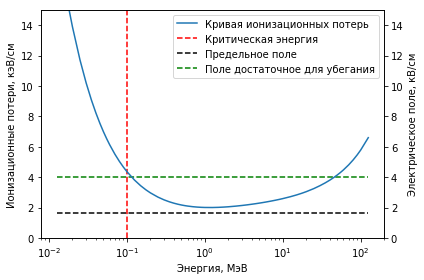

In [13]:
fig, ax1 = plt.subplots()
plt.plot(energy,stopPower*1.2e-3*1e3, label="Кривая ионизационных потерь")
ax1.set_ylim(0,15)
n = len(energy)
plt.vlines(0.1, 0 ,15, "r", linestyles="--", label="Критическая энергия")
# plt.plot(energy, np.ones(n)*4)
plt.xlabel(u'Энергия, МэВ')
plt.ylabel(r'Ионизационные потери, кэВ/см')
plt.xscale('log')
plt.hlines(stopPower.min(), energy.min(), energy.max(),"k", linestyles="--", label="Предельное поле")
plt.hlines(4, energy.min(), energy.max(), "g", linestyles="--",label = "Поле достаточное для убегания")
plt.legend(loc=0)
# plt.title(u'Energy loss');

ax2 = ax1.twinx()
ax2.set_ylim(0,15)


# ax2.plot(energy, np.ones(n)*1.5, 'r')
# ax2.plot(energy, np.ones(n)*4, 'g')
plt.ylabel(r'Электрическое поле, кВ/см');
# plt.legend()
plt.tight_layout();
# plt.savefig(os.path.join(image_path, '01_Gurevich.pdf'), transparent=True, format='pdf');